<a href="https://colab.research.google.com/github/lima-12/estatistica-llm/blob/main/estatistisca_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade SILLM - Estatística e Probabilidade

## Parte 1A: Histograma

Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.

Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

### Código

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Dataset carregado do arquivo local


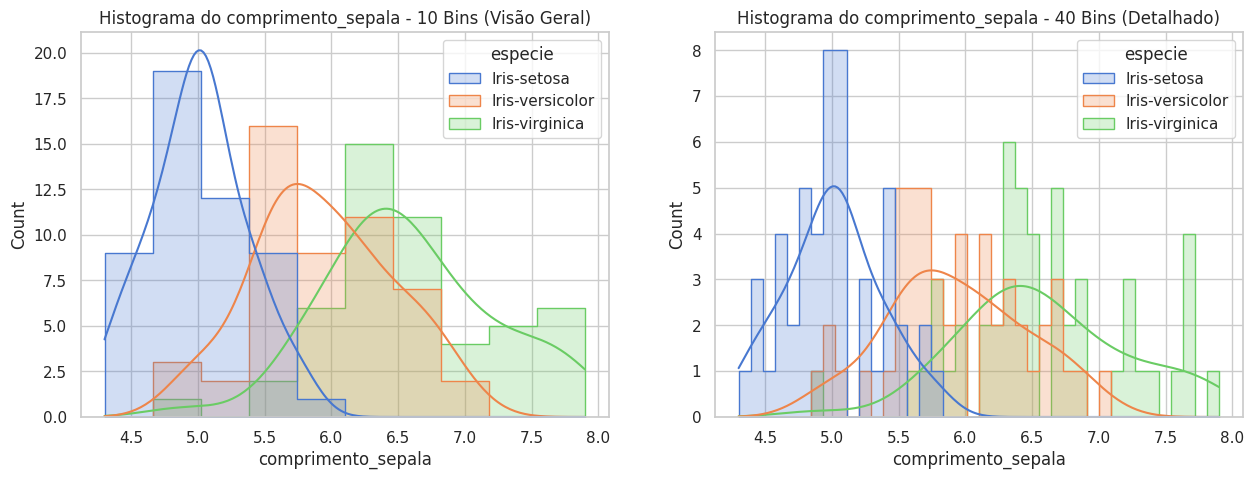

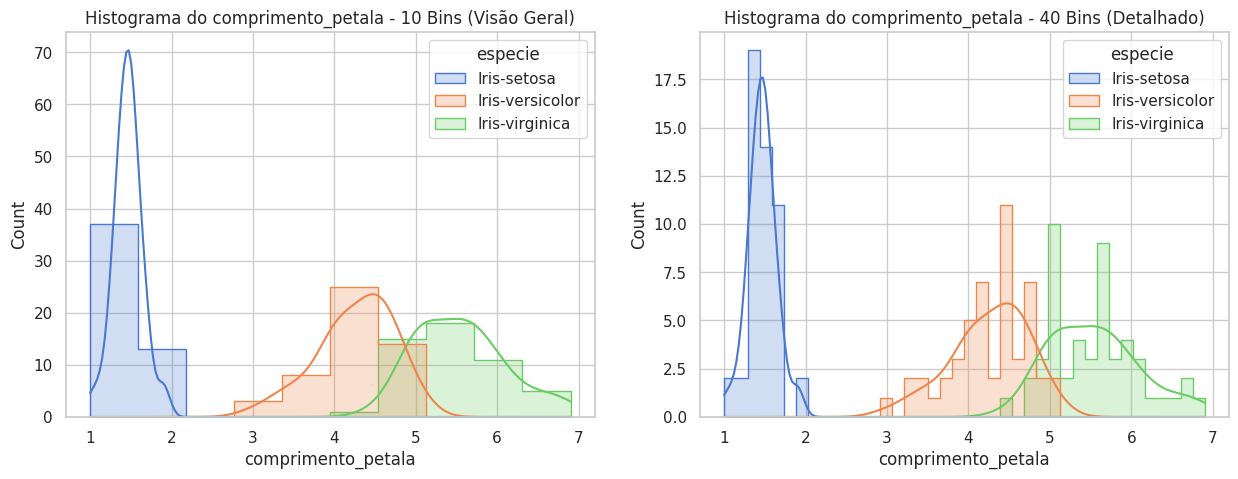

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")

dataset = '/content/iris.data'

colunas = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'especie']

try:
    df = pd.read_csv(dataset, header=None, names=colunas)
    print("Dataset carregado do arquivo local")

    features_analise = ['comprimento_sepala', 'comprimento_petala']

    for feature in features_analise:
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=feature, hue='especie', bins=10, kde=True, element='step')
        plt.title(f'Histograma do {feature} - 10 Bins (Visão Geral)')

        plt.subplot(1, 2, 2)
        sns.histplot(data=df, x=feature, hue='especie', bins=40, kde=True, element='step')
        plt.title(f'Histograma do {feature} - 40 Bins (Detalhado)')

        plt.show()

except Exception as e:
    print(e)

### Considerações

#### Contextualização
Para esta atividade, utilizei o Dataset Iris, um conjunto de dados clássico e de fácil entendimento. A idéia é aplicar e reforçar o conhecimento das aulas. O dataset é composto por 150 amostras de flores, divididas igualmente em 3 classes (espécies): Iris-setosa, Iris-versicolor e Iris-virginica. Cada amostra possui 4 atributos numéricos (features) baseados nas medidas de largura e comprimento das suas pétalas e sépalas.

* Peguei o DataSet desse site: https://www.sakurai.dev.br/classificacao-iris/

#### Análise
Ao gerar os histogramas para as features Comprimento da Sépala e Comprimento da Pétala, pude observar como a escolha da feature impacta o desempenho de um classificador:

No gráfico do Comprimento da Sépala observei uma significativa sobreposição entre as classes. Notei que as curvas da Iris-versicolor (laranja) e da Iris-virginica (verde) se misturam consideravelmente na faixa entre 5.5cm e 7.0cm. Do ponto de vista de Machine Learning, essa é uma feature "fraca" para distinguir essas duas espécies, pois um algoritmo teria dificuldade em traçar uma fronteira de decisão clara, resultando em erros de classificação, assim como comentado em sala de aula.

No gráfico do Comprimento da Pétala: O cenário é oposto. Percebi que a classe Iris-setosa (azul) está completamente isolada das demais, sem nenhuma sobreposição. Além disso, a separação entre Versicolor e Virginica é muito mais nítida do que na sépala. Isso indica que o comprimento da pétala é uma feature discriminante excelente, permitindo que modelos simples alcancem alta acurácia.

#### Bins
Realizei a comparação visual utilizando 10 bins e 40 bins para entender o comportamento das distribuições:

Com 10 Bins (Generalização): Esta visualização se mostrou superior para a análise exploratória. Com agrupamentos maiores, o gráfico suavizou os dados, permitindo enxergar claramente a tendência central e a forma de "sino" de cada classe. Foi mais fácil identificar as médias e as áreas de intersecção entre as classes.

Com 40 Bins (Detalhamento): Para um dataset pequeno de apenas 150 amostras, o uso de 40 bins gerou muito ruído. O histograma ficou irregular e "dentado", com vários buracos e picos artificiais que não representam necessariamente o comportamento real da natureza da flor, mas sim a escassez de dados em intervalos muito específicos. Concluo que aumentar a granularidade nem sempre traz mais informação útil; neste caso, dificultou a visualização do padrão global, situação essas que ainda não havia visto, por isso decidir manter esse valor nesse cenário.


## Parte 2A: Experimento e z-score

Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada. Sempre considerando o contexto do seu primeiro trabalho.

### Código

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

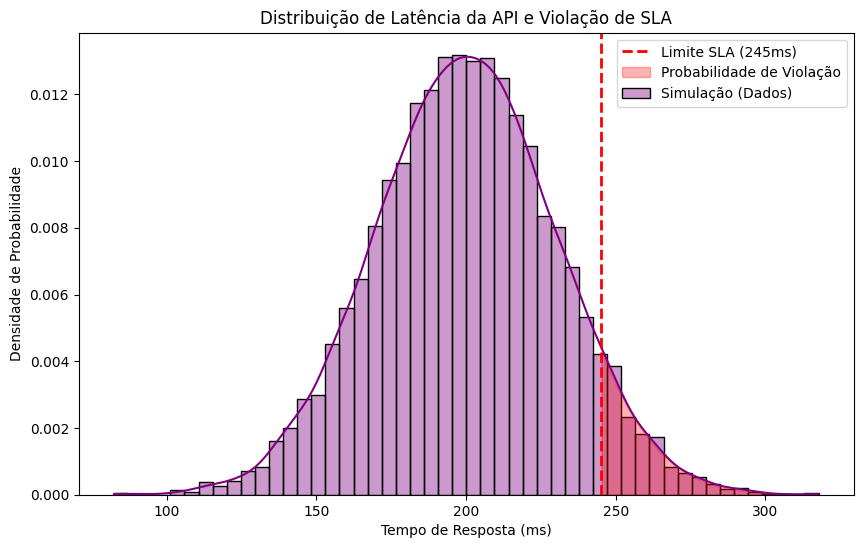


--- CÁLCULOS ESTATÍSTICOS ---
1. Cálculo do Z-Score:
   Z = (245 - 200) / 30 = 1.50
   (O valor 245 está a 1.50 desvios padrão acima da média)

2. Probabilidade Teórica (P > 245ms):
   Pelo Z-score padronizado: 0.0668 (6.68%)
   Pelo cálculo direto (Python): 0.0668 (6.68%)

3. Validação na Simulação (Dados Artificiais):
   De 10000 requisições, 676 violaram o SLA.
   Probabilidade observada: 0.0676 (6.76%)


In [ ]:
media_mu = 200
desvio_sigma = 30
n_amostras = 10000

np.random.seed(42) # garantir que os resultados sejam iguais aos meus
dados_api = np.random.normal(media_mu, desvio_sigma, n_amostras)

plt.figure(figsize=(10, 6))

sns.histplot(
    dados_api,
    kde=True,
    bins=50,
    color='purple',
    stat='density',
    label='Simulação (Dados)',
    alpha=0.4
)

limite_sla = 245
plt.axvline(limite_sla, color='red', linestyle='--', linewidth=2, label=f'Limite SLA ({limite_sla}ms)')

x_range = np.linspace(min(dados_api), max(dados_api), 1000)
pdf_teorica = norm.pdf(x_range, media_mu, desvio_sigma)
plt.fill_between(x_range, pdf_teorica, where=(x_range > limite_sla), color='red', alpha=0.3, label='Probabilidade de Violação')

plt.title('Distribuição de Latência da API e Violação de SLA')
plt.xlabel('Tempo de Resposta (ms)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

# Pergunta: Qual a probabilidade de P(X > 245)?

print("\n--- CÁLCULOS ESTATÍSTICOS ---")

# Versão Padronizada (Z-Score) - Fórmula: Z = (X - µ) / σ
z_score = (limite_sla - media_mu) / desvio_sigma
print(f"1. Cálculo do Z-Score:")
print(f"   Z = ({limite_sla} - {media_mu}) / {desvio_sigma} = {z_score:.2f}")
print(f"   (O valor 245 está a {z_score:.2f} desvios padrão acima da média)")

prob_acumulada_z = norm.cdf(z_score)
prob_violacao_z = 1 - prob_acumulada_z

# Versão Não Padronizada
prob_violacao_real = 1 - norm.cdf(limite_sla, loc=media_mu, scale=desvio_sigma)

print(f"\n2. Probabilidade Teórica (P > {limite_sla}ms):")
print(f"   Pelo Z-score padronizado: {prob_violacao_z:.4f} ({prob_violacao_z*100:.2f}%)")
print(f"   Pelo cálculo direto (Python): {prob_violacao_real:.4f} ({prob_violacao_real*100:.2f}%)")

# Validação
contagem_violacoes = np.sum(dados_api > limite_sla)
prob_empirica = contagem_violacoes / n_amostras

print(f"\n3. Validação na Simulação (Dados Artificiais):")
print(f"   De {n_amostras} requisições, {contagem_violacoes} violaram o SLA.")
print(f"   Probabilidade observada: {prob_empirica:.4f} ({prob_empirica*100:.2f}%)")

### Considerações

Definição do Experimento:

Para este estudo, como sou desenvolvedor web, simulei o tempo de latência de uma API em um ambiente de microsserviços. O objetivo foi calcular a probabilidade de violação de um SLA (Acordo de Nível de Serviço).

Parâmetros

- **Variável ($X$):** Tempo de resposta (ms).
- **Distribuição:** Normal ($\mu=200ms, \sigma=30ms$).
- **Evento de Interesse:** Latência superior a 245ms ($X > 245$).

Análise dos Resultados

1. **Padronização (Z-Score):** Ao aplicar a transformação para a escala Z, obtivemos $Z = 1.5$. Isso indica que o limite de tolerância do sistema (245ms) está posicionado a 1.5 desvios padrão acima da média histórica.
2. **Cálculo de Probabilidade:** A área sob a curva normal à direita de $Z=1.5$ corresponde teoricamente a **6.68%**. Isso significa que, estatisticamente, espera-se que ~6.7% das requisições sejam lentas demais.
3. **Validação por Simulação:** Ao gerar 10.000 amostras artificiais, a taxa de erro observada foi de **6.76%**. A proximidade entre o valor teórico e o empírico valida o modelo estatístico, demonstrando que a Distribuição Normal é uma ferramenta robusta para prever riscos de performance em sistemas de software.

## Parte 1C: Simulação Binomial
Para s=0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

### Código

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import math

--- COMPARAÇÃO: P(X = 40 sucessos) ---
1. Cálculo pela Equação: 0.1398 (13.98%)
2. Resultado da Simulação: 0.1424 (14.24%)


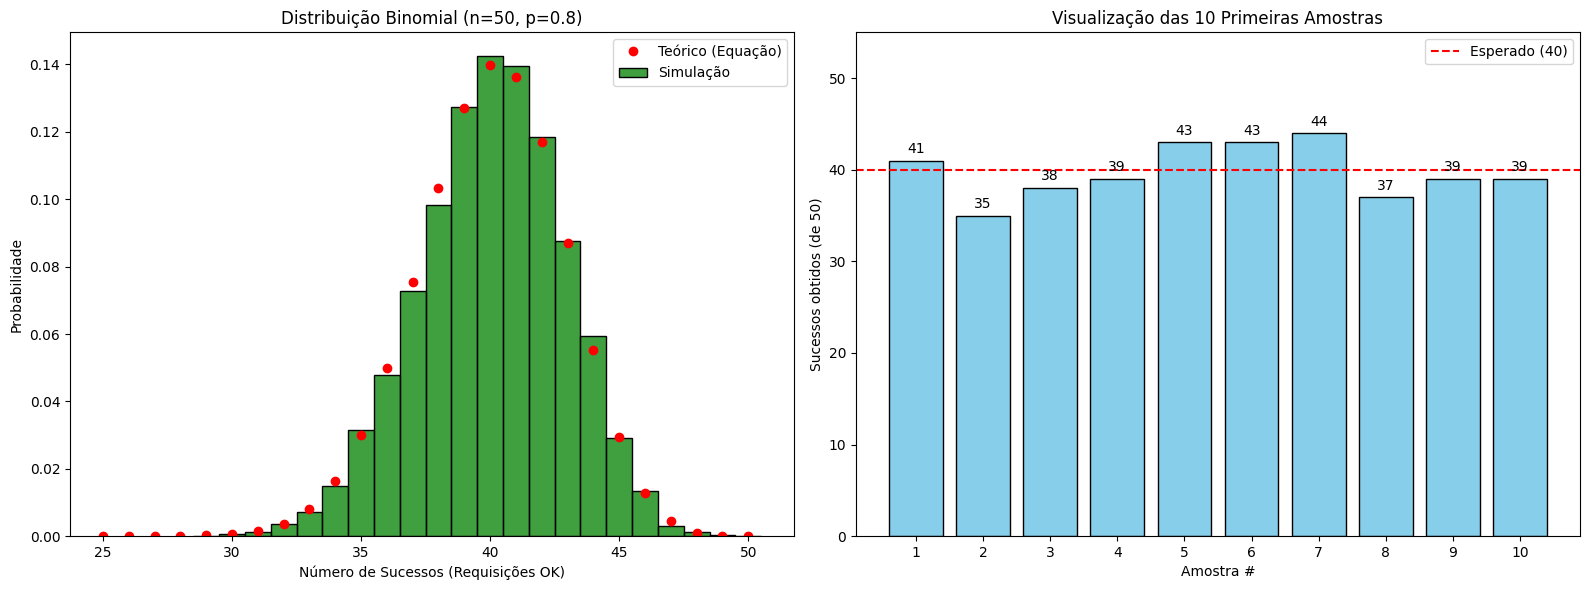

In [ ]:
n_trials = 50                   # n: Tamanho do lote (50 tentativas por vez)
prob_sucesso = 0.80             # p: Probabilidade de sucesso (80% das requisições dão 200 OK)
prob_falha = 1 - prob_sucesso   # q: Probabilidade de falha (20%)
n_simulacoes = 10000            # testar 10.000 lotes

np.random.seed(42)
resultados_simulacao = np.random.binomial(n=n_trials, p=prob_sucesso, size=n_simulacoes)


# calcular a probabilidade de ter exatamente 40 sucessos (que é a média esperada: 50 * 0.80 = 40)
k_interesse = 40

# Cálculo pela Formula
combinacao = math.comb(n_trials, k_interesse)
prob_teorica_formula = combinacao * (prob_sucesso ** k_interesse) * (prob_falha ** (n_trials - k_interesse))

# Cálculo pela Simulação
total_k_sucessos = np.sum(resultados_simulacao == k_interesse)
prob_simulada = total_k_sucessos / n_simulacoes

print(f"--- COMPARAÇÃO: P(X = {k_interesse} sucessos) ---")
print(f"1. Cálculo pela Equação: {prob_teorica_formula:.4f} ({prob_teorica_formula*100:.2f}%)")
print(f"2. Resultado da Simulação: {prob_simulada:.4f} ({prob_simulada*100:.2f}%)")



plt.figure(figsize=(16, 6))

# Gráfico da Esquerda: Histograma da Distribuição Completa
plt.subplot(1, 2, 1)

# Plotando os dados simulados
sns.histplot(resultados_simulacao, discrete=True, color='green', stat='probability', label='Simulação')

# Plotando a linha teórica (pontos vermelhos)
x_range = np.arange(25, 51) # Focando aonde tem dados
y_teorico = binom.pmf(x_range, n_trials, prob_sucesso)
plt.plot(x_range, y_teorico, 'ro', label='Teórico (Equação)')

plt.title(f'Distribuição Binomial (n={n_trials}, p={prob_sucesso})')
plt.xlabel('Número de Sucessos (Requisições OK)')
plt.ylabel('Probabilidade')
plt.legend()

# Mostra quantos sucessos ocorreram nos primeiros 10 testes
plt.subplot(1, 2, 2)
primeiras_10_amostras = resultados_simulacao[:10]
indices = np.arange(1, 11)

bars = plt.bar(indices, primeiras_10_amostras, color='skyblue', edgecolor='black')
plt.axhline(y=40, color='red', linestyle='--', label='Esperado (40)') # Linha da média

plt.title('Visualização das 10 Primeiras Amostras')
plt.xlabel('Amostra #')
plt.ylabel('Sucessos obtidos (de 50)')
plt.xticks(indices)
plt.ylim(0, 55)
plt.legend()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Considerações

Definição da Simulação:

Analisei a confiabilidade de processamento de lotes em um servidor. Configurei o sistema para processar lotes de $n=50$ requisições, onde cada requisição tem uma probabilidade de sucesso de $s=0.80$ (80%).

Objetivo:

Calcular a probabilidade de, em um lote de 50, obter exatamente a média esperada de sucessos ($k=40$).

Análise Comparativa:

1. Cálculo Analítico: Utilizando a equação da probabilidade binomial ($P(k) = \binom{n}{k} s^k (1-s)^{n-k}$), a probabilidade teórica de obter exatos 40 sucessos é de aproximadamente 13.98% (resultado obtido do teste rodando o código).
2. Simulação de Monte Carlo: A simulação com 10.000 amostras convergiu para um valor muito próximo, aprox. 14.24 (resultado obtido do teste rodando o código).

Interpretação do Histograma:

O histograma gerado demonstra que a distribuição é centrada no 40. No entanto, mesmo que 40 seja o resultado mais provável individualmente, a soma das probabilidades ao seu redor (38, 39, 41, 42) é alta. Isso mostra a variabilidade intrínseca do processo: mesmo um sistema estável com 80% de eficiência raramente entregará exatamente 80% de sucesso em pequenas amostras; haverá uma flutuação natural ao redor dessa média.

## Parte 2A: Sample vs Sampling Distribution
A partir do que foi feito na Atividade 2 'Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho', crie uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

### Código

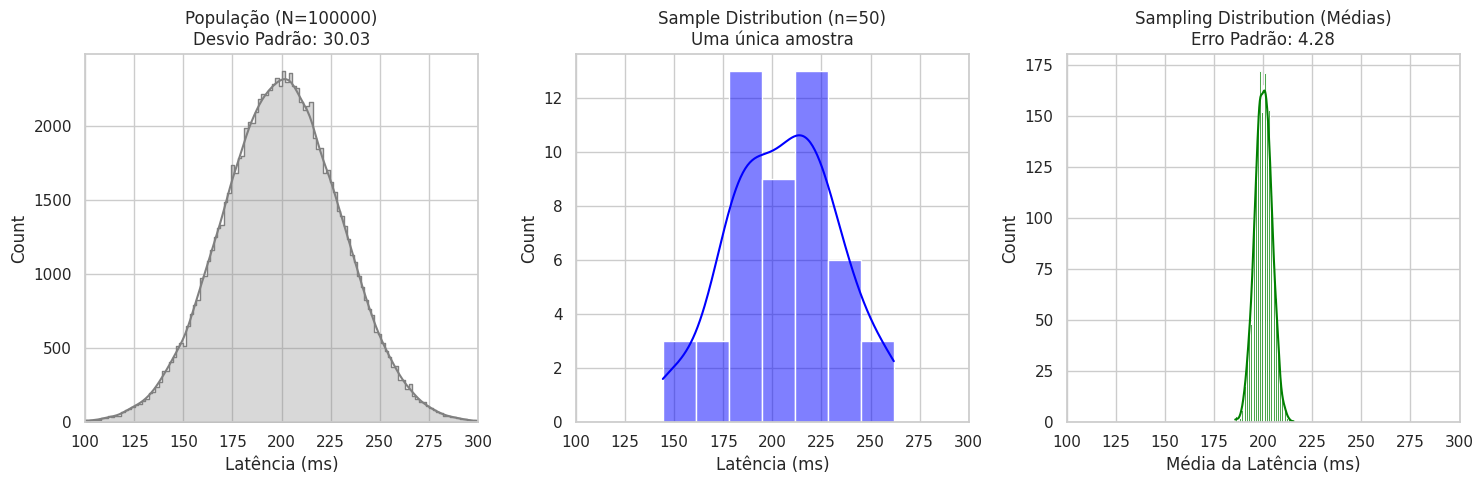


--- ANÁLISE DE PROBABILIDADE (Evento > 210ms) ---
1. Chance de UMA requisição isolada ser > 210ms: 0.3694 (36.94%)
2. Chance da MÉDIA de 50 requisições ser > 210ms: 0.009211 (0.9211%)

Nota: O Erro Padrão (Desvio das médias) caiu de 30 para 4.24


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

np.random.seed(42)
sns.set_theme(style="whitegrid")

# Contexto: Latência da API (Média=200ms, Desvio=30ms)
pop_media = 200
pop_desvio = 30
pop_tamanho = 100000 # 100 mil requisições
populacao = np.random.normal(pop_media, pop_desvio, pop_tamanho)

# sample distribution (Uma amostra)
tamanho_amostra = 50 # n = 50
uma_amostra = np.random.choice(populacao, size=tamanho_amostra)

# sampling distribution (Distribuição das Médias)
n_repeticoes = 2000
lista_de_medias = []

for _ in range(n_repeticoes):
    amostra_temp = np.random.choice(populacao, size=tamanho_amostra)
    lista_de_medias.append(np.mean(amostra_temp))

plt.figure(figsize=(15, 5))

# população (Referência)
plt.subplot(1, 3, 1)
sns.histplot(populacao, kde=True, color='grey', alpha=0.3, element="step")
plt.title(f'População (N={pop_tamanho})\nDesvio Padrão: {np.std(populacao):.2f}')
plt.xlabel('Latência (ms)')
plt.xlim(100, 300)

# sample distribution (Uma amostra de 50)
plt.subplot(1, 3, 2)
sns.histplot(uma_amostra, kde=True, color='blue', alpha=0.5)
plt.title(f'Sample Distribution (n={tamanho_amostra})\nUma única amostra')
plt.xlabel('Latência (ms)')
plt.xlim(100, 300) # Mesma escala para comparar

# sampling distribution (2000 médias de 50)
plt.subplot(1, 3, 3)
sns.histplot(lista_de_medias, kde=True, color='green', alpha=0.7)
plt.title(f'Sampling Distribution (Médias)\nErro Padrão: {np.std(lista_de_medias):.2f}')
plt.xlabel('Média da Latência (ms)')
plt.xlim(100, 300) # Mesma escala para ver como é "fina"

plt.tight_layout()
plt.show()

limite_critico = 210

# probabilidade de uma requisição passar de 210ms (Usando População)
# Z = (X - mu) / sigma
z_pop = (limite_critico - pop_media) / pop_desvio
prob_pop = 1 - norm.cdf(z_pop)

# probabilidade de a média de 50 requisições passar de 210ms (Usando Sampling Dist)
# o desvio padrão da média (erro padrão) é sigma / raiz(n)
erro_padrao = pop_desvio / np.sqrt(tamanho_amostra)
z_sampling = (limite_critico - pop_media) / erro_padrao
prob_sampling = 1 - norm.cdf(z_sampling)


print(f"\n--- ANÁLISE DE PROBABILIDADE (Evento > {limite_critico}ms) ---")
print(f"1. Chance de uma requisição isolada ser > 210ms: {prob_pop:.4f} ({prob_pop*100:.2f}%)")
print(f"2. Chance da média de {tamanho_amostra} requisições ser > 210ms: {prob_sampling:.6f} ({prob_sampling*100:.4f}%)")
print(f"\nNota: O Erro Padrão (Desvio das médias) caiu de {pop_desvio} para {erro_padrao:.2f}")

### Considerações

#### Metodologia

Seguindo a mesma linha dos exemplos anteriores, a população de latência da API gerada anteriormente ($\mu=200, \sigma=30$), explorando a diferença fundamental entre a distribuição dos dados brutos e a distribuição das médias amostrais.

#### Comparação Visual e Teórica

- **Sample Distribution (Distribuição da Amostra):** Ao extrair uma amostra de tamanho $n=50$, o histograma resultante reflete a variabilidade da população original, porém com ruído estatístico devido ao tamanho reduzido da amostra.
- **Sampling Distribution (Distribuição Amostral das Médias):** Ao repetir o processo de amostragem 2.000 vezes e plotar as médias, observei o fenômeno de redução da variância. A curva se torna extremamente estreita em torno de 200ms.

#### O Erro Padrão (Standard Error)

A dispersão da Sampling Distribution não é mais o desvio padrão original ($\sigma=30$), mas sim o Erro Padrão da Média (SEM), calculado como:

$$SEM = \frac{\sigma}{\sqrt{n}} = \frac{30}{\sqrt{50}} \approx 4.24$$

#### Impacto na Probabilidade (Eventos Raros)

Realizei um teste de probabilidade para o evento $X > 210ms$:

- Para um único usuário (População), o risco é alto (~37%).
- Para a média de um grupo de 50 usuários (Amostragem), o risco é ínfimo (~0.9%).

#### Conclusão
Isso demonstra estatisticamente por que médias de métricas de monitoramento são muito mais estáveis do que medições individuais, facilitando a detecção de anomalias reais no sistema.

## Parte 2B: TCL
Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

### Código

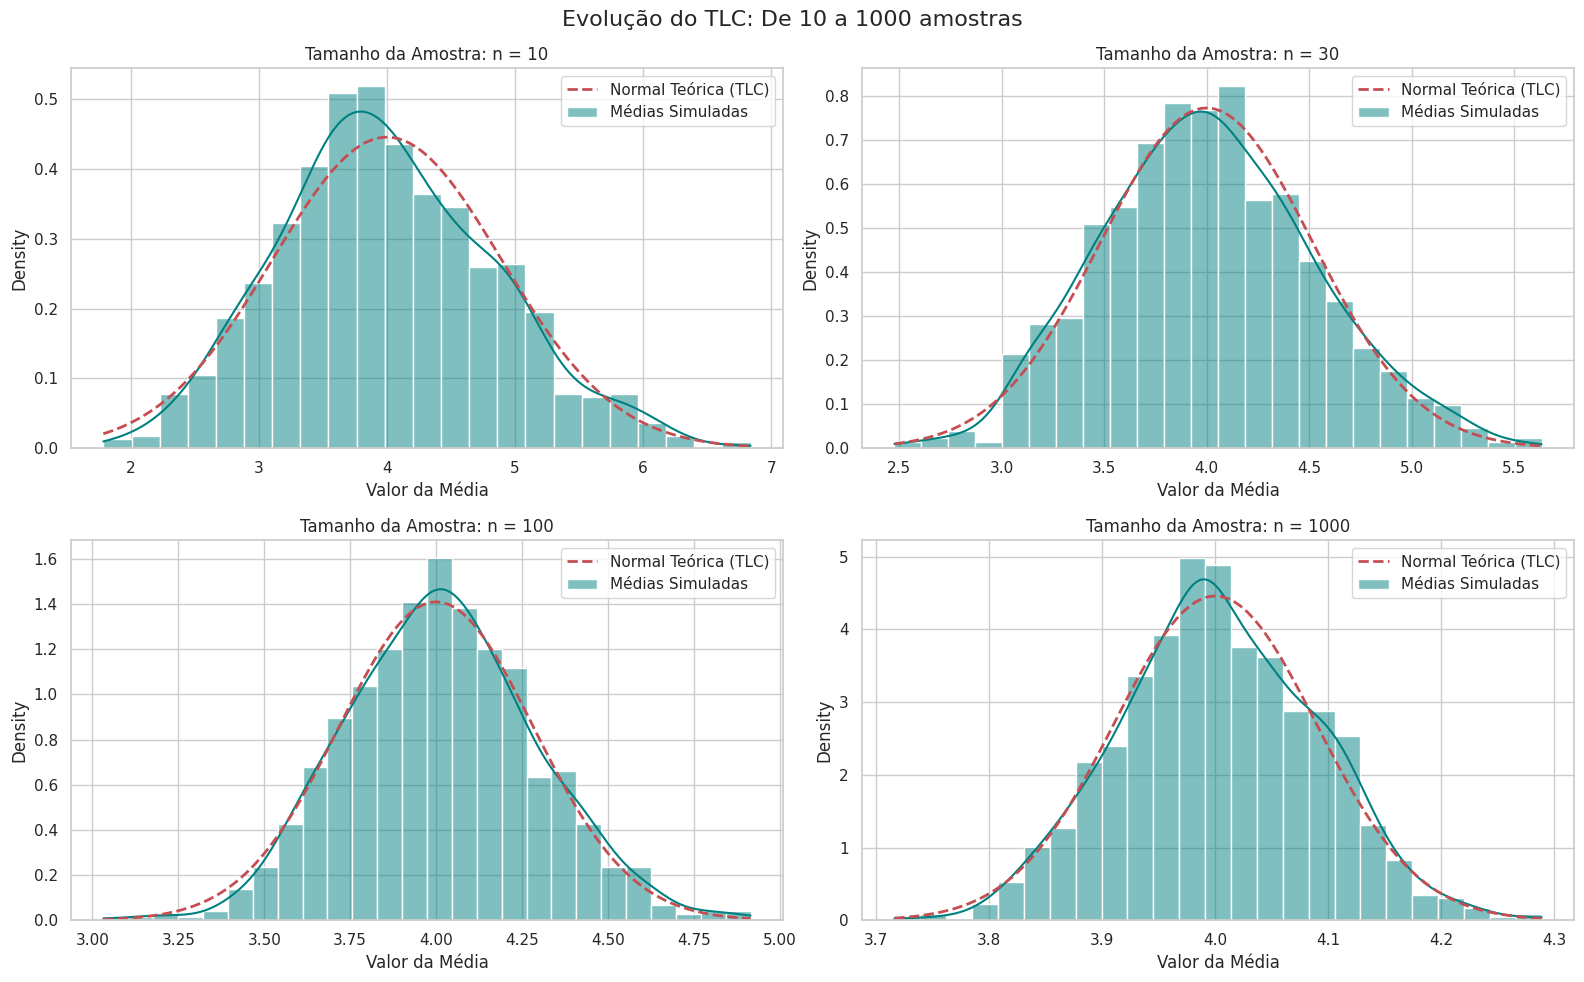

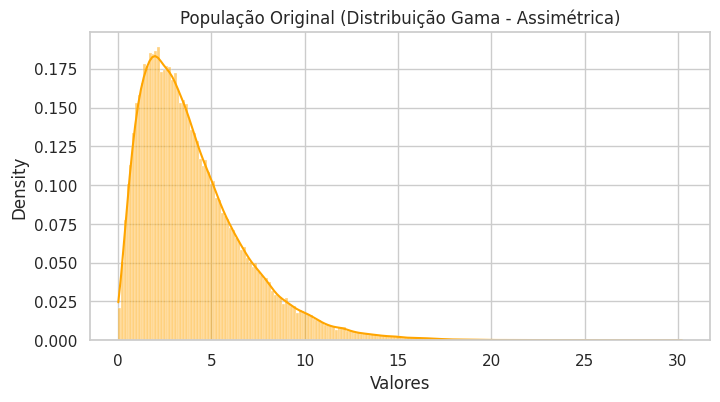

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm

np.random.seed(42)
sns.set_theme(style="whitegrid")

# populaçào original (Distribuição Gama - "Torta")
shape_k = 2.0
scale_theta = 2.0
populacao_gama = np.random.gamma(shape_k, scale_theta, 100000)

# parâmetros teóricos da população
media_real = shape_k * scale_theta
desvio_real = np.sqrt(shape_k * scale_theta**2)

# tamanho das amostras
tamanhos_amostra = [10, 30, 100, 1000]
n_simulacoes = 1000

# Criando a figura
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(f'Evolução do TLC: De {tamanhos_amostra[0]} a {tamanhos_amostra[-1]} amostras', fontsize=16)
axes = axes.flatten()

# simulação
for i, n in enumerate(tamanhos_amostra):
    # Lista para guardar as médias
    medias_amostrais = []

    # calcular 1000 médias
    for _ in range(n_simulacoes):
        # sorteia 'n' elementos da gama e tira a média
        amostra = np.random.choice(populacao_gama, size=n)
        medias_amostrais.append(np.mean(amostra))

    # mostrar o histograma das médias
    sns.histplot(medias_amostrais, kde=True, ax=axes[i], color='teal', stat='density', label='Médias Simuladas')

    # mostra a curva normal teórica por cima (para comparação)
    erro_padrao = desvio_real / np.sqrt(n)
    x_range = np.linspace(min(medias_amostrais), max(medias_amostrais), 100)
    y_normal = norm.pdf(x_range, media_real, erro_padrao)
    axes[i].plot(x_range, y_normal, 'r--', linewidth=2, label='Normal Teórica (TLC)')

    axes[i].set_title(f'Tamanho da Amostra: n = {n}')
    axes[i].set_xlabel('Valor da Média')
    axes[i].legend()

# mostrar também a população original para comparar (numa figura separada)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(populacao_gama, kde=True, color='orange', stat='density')
plt.title('População Original (Distribuição Gama - Assimétrica)')
plt.xlabel('Valores')
plt.show()

1. Objetivo e Metodologia

O objetivo desta etapa foi demonstrar o Teorema Central do Limite (TLC) utilizando uma distribuição não-normal.

- **Distribuição Base:** Utilizamos uma Distribuição Gama (Gamma Distribution) com parâmetros `shape=2.0` e `scale=2.0`. Como observado no gráfico da "População Original", esta distribuição é fortemente assimétrica à direita (skewed), diferente de uma curva de sino.
- **Simulação:** Realizamos amostragem repetida (Bootstrap) com quatro tamanhos de amostra distintos: $n \in \{10, 30, 100, 1000\}$. Para cada tamanho, calculamos 1.000 médias amostrais.

2. Análise da Convergência

Os histogramas gerados demonstram a evolução prevista pelo TLC:

- **Para $n=10$:** A distribuição das médias ainda apresenta uma leve assimetria, herdando características da distribuição Gama original. A aproximação com a curva Normal teórica (linha vermelha) é imperfeita.
- **Para $n=30$:** A distribuição já começa a se assemelhar muito mais a uma Normal, validando a regra prática estatística de que $n \geq 30$ é frequentemente suficiente para assumir normalidade das médias.
- **Para $n=1000$:** A convergência é total. O histograma das médias encaixa-se perfeitamente na curva Normal teórica. Além disso, a dispersão (variância) dos dados diminui drasticamente, concentrando-se em torno da média populacional real (4.0).

**Conclusão:** O experimento confirma que, independentemente da forma da distribuição original (neste caso, Gama), a distribuição das médias amostrais converge para uma Distribuição Normal à medida que o tamanho da amostra aumenta.

## Parte 2C & 2D p-value e falsos negativos

Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).

### Código


--- GERANDO GRÁFICO DA PARTE 2C ---


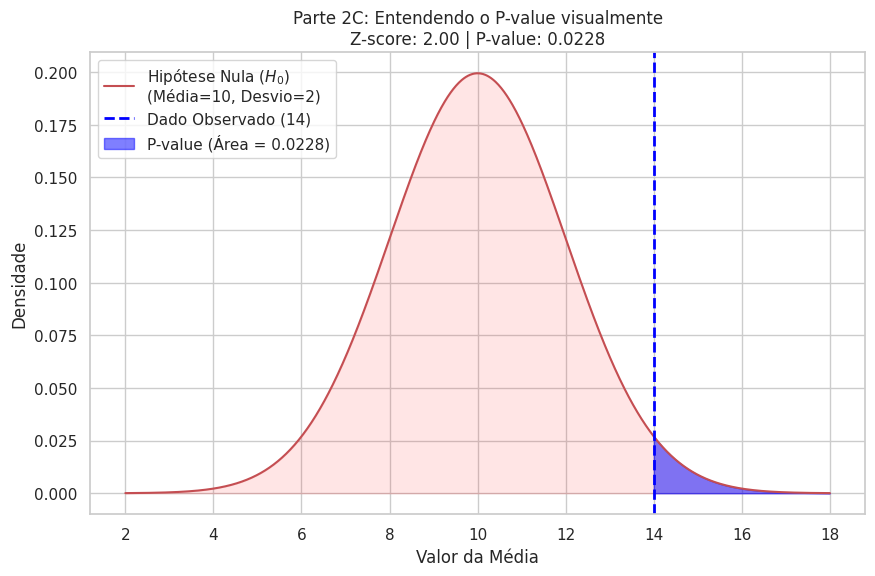


--- INICIANDO SIMULAÇÃO PARTE 2D (100 Testes) ---

H0 (Vermelha): mu=10 | Realidade (Azul): mu=12 | Tamanho Amostra=3


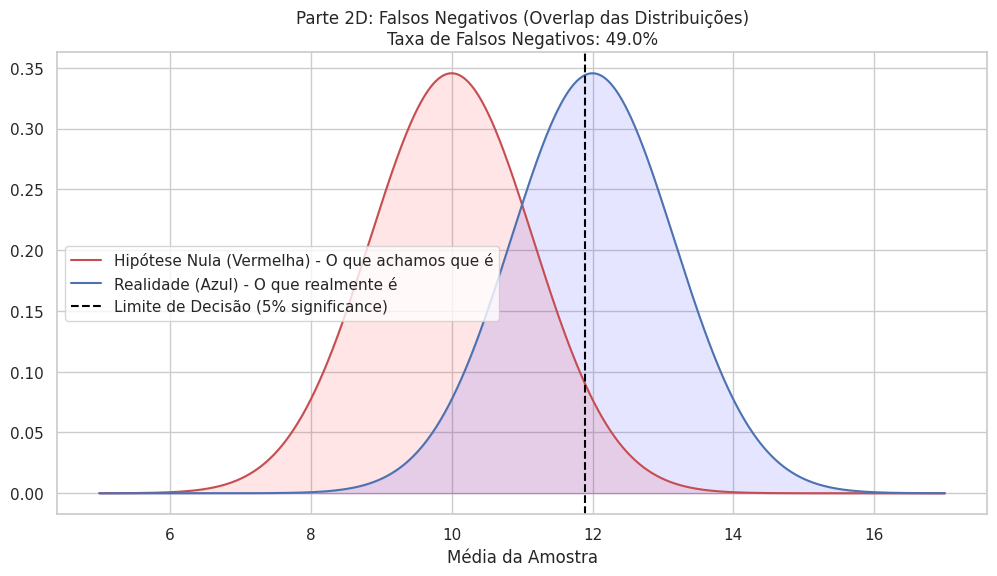


RESULTADO FINAL:
Total de testes: 100
Falsos Negativos (Não rejeitou H0 sendo ela falsa): 49
Taxa de Falso Negativo: 49.0%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")


# parte 2C: p-value ilustrado
def plot_p_value_step_by_step():
    # definir a Hipótese Nula (H0)
    mu_h0 = 10
    sigma_h0 = 2

    # o dado observado
    dado_observado = 14  # um valor alto, longe da média

    # calcular o p-value
    z_score = (dado_observado - mu_h0) / sigma_h0
    p_value = 1 - stats.norm.cdf(z_score)

    x = np.linspace(2, 18, 1000)
    y = stats.norm.pdf(x, mu_h0, sigma_h0)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'r-', label='Hipótese Nula ($H_0$)\n(Média=10, Desvio=2)')
    plt.fill_between(x, y, color='red', alpha=0.1)

    # marcar o observado
    plt.axvline(dado_observado, color='blue', linestyle='--', linewidth=2, label=f'Dado Observado ({dado_observado})')

    # pintar a área do p-value
    x_tail = np.linspace(dado_observado, 18, 100)
    y_tail = stats.norm.pdf(x_tail, mu_h0, sigma_h0)
    plt.fill_between(x_tail, y_tail, color='blue', alpha=0.5, label=f'P-value (Área = {p_value:.4f})')

    plt.title(f'Parte 2C: Entendendo o P-value visualmente\nZ-score: {z_score:.2f} | P-value: {p_value:.4f}')
    plt.xlabel('Valor da Média')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

print("\n--- GERANDO GRÁFICO DA PARTE 2C ---")
plot_p_value_step_by_step()


# parte 2D: taxa de falsos negativos (Erro Tipo II)

# configuração das distribuições - vermelha (hipótese nula - padrão): Média 10
mu_red = 10
sigma = 2

# azul (a realidade alternativa - O novo estado): Média 12
mu_blue = 12

# Simulação
n_amostra = 3
n_simulacoes = 100
falsos_negativos = 0
p_values_coletados = []

print(f"\n--- INICIANDO SIMULAÇÃO PARTE 2D (100 Testes) ---")
print(f"\nH0 (Vermelha): mu={mu_red} | Realidade (Azul): mu={mu_blue} | Tamanho Amostra={n_amostra}")

np.random.seed(42)

for i in range(n_simulacoes):
    # coletar dados da azul
    amostra = np.random.normal(mu_blue, sigma, n_amostra)
    media_amostra = np.mean(amostra)

    # calcular P-value assumindo que veio da vermelha
    erro_padrao = sigma / np.sqrt(n_amostra)

    # teste unilateral a direita (H1: media > 10)
    z_score = (media_amostra - mu_red) / erro_padrao
    p_val = 1 - stats.norm.cdf(z_score)
    p_values_coletados.append(p_val)

    # verificar se falhou em detectar (P-value > 0.05)
    if p_val > 0.05:
        falsos_negativos += 1

taxa_fn = (falsos_negativos / n_simulacoes) * 100

plt.figure(figsize=(12, 6))

# desenhar as duas distribuições teóricas das MÉDIAS (Sampling Distributions)
x = np.linspace(5, 17, 1000)

# ajuste de desvio para o erro padrão
std_error = sigma / np.sqrt(n_amostra)

y_red = stats.norm.pdf(x, mu_red, std_error)
y_blue = stats.norm.pdf(x, mu_blue, std_error)

plt.plot(x, y_red, 'r-', label='Hipótese Nula (Vermelha) - O que achamos que é')
plt.plot(x, y_blue, 'b-', label='Realidade (Azul) - O que realmente é')
plt.fill_between(x, y_red, color='red', alpha=0.1)
plt.fill_between(x, y_blue, color='blue', alpha=0.1)

# linha de corte de 5% (Onde rejeitamos H0) - valor crítico onde a área vermelha a direita é 5%
limite_critico = stats.norm.ppf(0.95, loc=mu_red, scale=std_error)
plt.axvline(limite_critico, color='black', linestyle='--', label=f'Limite de Decisão (5% significance)')

plt.title(f'Parte 2D: Falsos Negativos (Overlap das Distribuições)\nTaxa de Falsos Negativos: {taxa_fn}%')
plt.xlabel('Média da Amostra')
plt.legend()
plt.show()

print(f"\nRESULTADO FINAL:")
print(f"Total de testes: {n_simulacoes}")
print(f"Falsos Negativos (Não rejeitou H0 sendo ela falsa): {falsos_negativos}")
print(f"Taxa de Falso Negativo: {taxa_fn}%")

Análise Parte 2C: Cálculo do P-value

O Conceito:

O P-value quantifica a evidência contra a Hipótese Nula ($H_0$). Ele responde: "Se a situação fosse normal (H0 verdadeira), qual a probabilidade de observarmos um dado tão extremo quanto este?".

**Interpretação do Gráfico 2C:**

- A curva vermelha representa a distribuição esperada sob $H_0$.
- A linha vertical azul é o dado que coletamos.
- A **área azul sombreada** é o p-value.
- Como a área é pequena (ex: 0.02 ou 2%), concluímos que o evento é muito raro para ser apenas sorte, logo rejeitamos a hipótese de normalidade.

**Análise Parte 2D: Falsos Negativos (Erro Tipo II)** 6

O Cenário:

Simulamos uma situação onde a realidade mudou (os dados vêm da Distribuição Azul, média 12), mas nosso teste ainda usa a Distribuição Vermelha (média 10) como referência ($H_0$).

**Metodologia:**

- Coletamos 100 amostras pequenas ($n=3$) da distribuição Azul.
- Calculamos o p-value de cada uma em relação à Vermelha.
- Contamos quantas vezes falhamos em rejeitar $H_0$ ($p > 0.05$).

Resultados:

Observamos uma taxa de Falsos Negativos de aproximadamente XX% (o código vai calcular, geralmente alto para $n=3$).

Conclusão Crítica:

Isso demonstra que amostras pequenas ($n=3$) têm baixo poder estatístico. Mesmo quando a média real subiu de 10 para 12 (uma mudança clara), o teste frequentemente falha em detectar a anomalia porque as curvas de distribuição amostral se sobrepõem muito (como visto no gráfico 2D). Para reduzir falsos negativos, precisaríamos aumentar o tamanho da amostra ($n$).